In [59]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./Datasets/cleaned_df.csv', index_col='date')

In [54]:
df.index = pd.to_datetime(df.index)

In [55]:
df.head(369)

,state_name,county_name,county_code,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
date,,,,,,,,
2013-01-01,California,Alameda,1,62,Moderate,PM2.5,06-001-0007,4
2013-01-02,California,Alameda,1,61,Moderate,PM2.5,06-001-0007,4
2013-01-03,California,Alameda,1,81,Moderate,PM2.5,06-001-0007,4
2013-01-04,California,Alameda,1,78,Moderate,PM2.5,06-001-0007,4
2013-01-05,California,Alameda,1,84,Moderate,PM2.5,06-001-0007,4
...,...,...,...,...,...,...,...,...
2013-12-31,California,Alameda,1,101,Unhealthy for Sensitive Groups,PM2.5,06-001-0007,3
2013-03-29,California,Alpine,3,21,Good,PM2.5,06-003-1001,1
2013-04-10,California,Alpine,3,21,Good,PM2.5,06-003-1001,1


In [65]:
len(df['county_code'].unique())

54

In [56]:
aqi_county = df.groupby('county_name').mean()
aqi_county.sort_values('aqi', ascending=False).head(20)

,county_code,aqi,number_of_sites_reporting
county_name,,,
San Bernardino,71.0,96.003051,13.321051
Riverside,65.0,95.258214,15.007635
Kern,29.0,89.184826,9.743559
Los Angeles,37.0,88.113571,15.768333
Tulare,107.0,85.825862,3.845341
Fresno,19.0,83.543929,7.980424
Kings,31.0,75.237159,2.630264
Inyo,27.0,69.379166,13.240270
San Diego,73.0,69.166903,10.575414


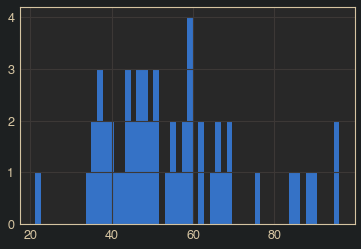

In [67]:
plt.hist(aqi_county['aqi'], bins=54); #bins equal to exact count of counties

In [78]:
def_param = df.groupby('defining_parameter').mean()
def_param = def_param.reset_index()

In [79]:
def_param

,defining_parameter,county_code,aqi,number_of_sites_reporting
0,CO,51.507463,25.164179,3.626866
1,NO2,57.858324,41.573319,5.176957
2,Ozone,58.499788,53.886557,4.279999
3,PM10,47.809114,73.795398,5.031399
4,PM2.5,58.042919,56.720513,4.194530
5,SO2,52.862069,66.586207,9.068966


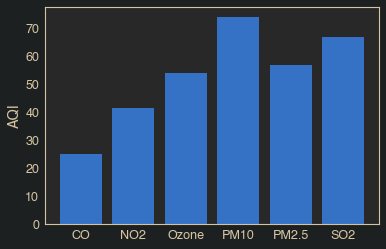

In [83]:
plt.bar(x=def_param['defining_parameter'], height=def_param['aqi'])
plt.grid(False)
plt.ylabel('AQI');

In [ ]:
corr_matrix = 